In [1]:
# setup libraries + read file

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle

# read file
df2019 = pd.read_csv(r'C:\Users\danie\Documents\GitHub\LTC-Research-Challenge\data\2019 Line 280 AVL allscripts.csv')
# df2019 = pd.read_csv('data/2019 Line 280 AVL allscripts.csv')

C:\Users\danie\AppData\Local\Temp/ipykernel_18476/3614151488.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_18476/3614151488.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__1  \
0                        0                0            0            0   
1                        8                6            0            0   
2                        6                6            0            0   
3                        9               10            0            0   
4                        0                6            0            0   
...                    ...              ...          ...          ...   
202608                   0                0            0            0   
202609                   9                9            0            0   
202610                   0               10            0            0   
202611                   0                3            0            0   
202612                   0                6            0            0   

        Enc_Hour__5  Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  \
0                 

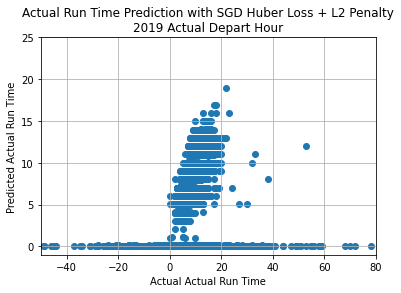

Mean Squared Error : 31.316860253832147
Mean Absolute Error : 2.761619944216609
[0.8852396  0.93508851 0.88526597 0.97020682 0.9350785 ]
0.92 accuracy with a standard deviation of 0.03


In [15]:
# SGD Huber Loss + L2 Penalty
# 2019 Actual Depart Hour only

df1 = df2019.copy()

df1 = pd.get_dummies(df1, columns=['Actual Depart Hour'],prefix=['Enc_Hour_'])


df1.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df1['Scheduled Run Time'] = df1['Scheduled Run Time'].astype(int)
df1['Actual Run Time'] = df1['Actual Run Time'].astype(int)

df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset','Day of Week','Transit Date Month'], 1, inplace=True)
print(df1.head)
X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df1['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)


plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Huber Loss + L2 Penalty\n2019 Actual Depart Hour')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_18476/1751076243.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_18476/1751076243.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__1  \
0                        0                0            0            0   
1                        8                6            0            0   
2                        6                6            0            0   
3                        9               10            0            0   
4                        0                6            0            0   
...                    ...              ...          ...          ...   
202608                   0                0            0            0   
202609                   9                9            0            0   
202610                   0               10            0            0   
202611                   0                3            0            0   
202612                   0                6            0            0   

        Enc_Hour__5  Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  \
0                 

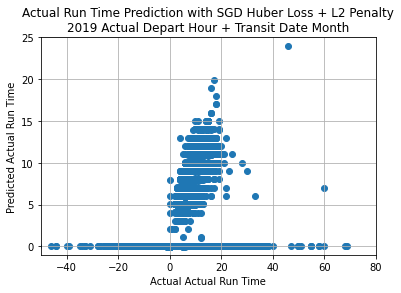

Mean Squared Error : 30.248238707905145
Mean Absolute Error : 2.762007341176173
[0.97379943 0.97091201 0.89152928 0.95905462 0.95435164]
0.95 accuracy with a standard deviation of 0.03


In [16]:
# SGD Huber Loss + L2 Penalty
# 2019 Actual Depart Hour + Transit Date Month

df2 = df2019.copy()

df2 = pd.get_dummies(df2, columns=['Actual Depart Hour', 'Transit Date Month'],prefix=['Enc_Hour_', 'Enc_Month_'])

df2.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df2['Scheduled Run Time'] = df2['Scheduled Run Time'].astype(int)
df2['Actual Run Time'] = df2['Actual Run Time'].astype(int)

df2.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset','Day of Week'], 1, inplace=True)
print(df2.head)
X = np.array(df2.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df2['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)


plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Huber Loss + L2 Penalty\n2019 Actual Depart Hour + Transit Date Month')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/1843467766.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_15700/1843467766.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__1  \
0                        0                0            0            0   
1                        8                6            0            0   
2                        6                6            0            0   
3                        9               10            0            0   
4                        0                6            0            0   
...                    ...              ...          ...          ...   
202608                   0                0            0            0   
202609                   9                9            0            0   
202610                   0               10            0            0   
202611                   0                3            0            0   
202612                   0                6            0            0   

        Enc_Hour__5  Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  \
0                 

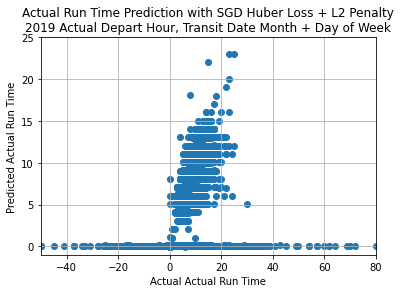

Mean Squared Error : 30.774365274027115
Mean Absolute Error : 2.7594129070477726
[0.94279632 0.93478539 0.93974674 0.9603652  0.93295601]
0.94 accuracy with a standard deviation of 0.01


In [6]:
# SGD Huber Loss + L2 Penalty
# 2019 Actual Depart Hour, Transit Date Month + Day of Week

df3 = df2019.copy()

df3 = pd.get_dummies(df3, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week']\
    ,prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_'])

df3.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df3['Scheduled Run Time'] = df3['Scheduled Run Time'].astype(int)
df3['Actual Run Time'] = df3['Actual Run Time'].astype(int)

df3.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset'], 1, inplace=True)
print(df3.head)
X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df3['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)



plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Huber Loss + L2 Penalty\n2019 Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/1667308078.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train


Wall time: 1.52 s


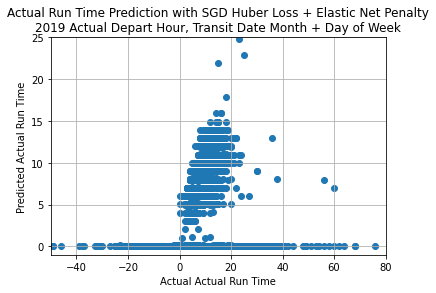

Mean Squared Error : 31.21069259864133
Mean Absolute Error : 2.783632721940511
[ 0.88466868  0.93923803  0.97311626 -0.00312313  0.95794116]
0.75 accuracy with a standard deviation of 0.38


In [19]:
# SGD Huber loss + Elastic Net Penalty
# 2019 Actual Depart Hour, Transit Date Month + Day of Week

X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df3['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber', penalty='elasticnet')
%time lr_sgd.fit(X_train, Y_train)

plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Huber Loss + Elastic Net Penalty\n2019 Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/435912371.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train


Wall time: 212 ms


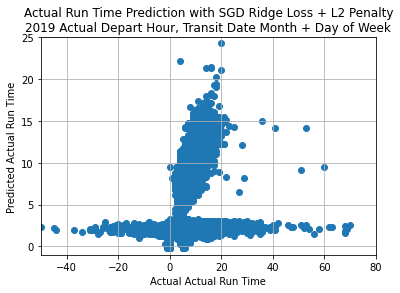

Mean Squared Error : 26.629919474842538
Mean Absolute Error : 3.3613795804355617
[0.95078096 0.97374447 0.98089476 0.96402424 0.94612279]
0.96 accuracy with a standard deviation of 0.01


In [17]:
# SGD Ridge loss + L2 Penalty
# 2019 Actual Depart Hour, Transit Date Month + Day of Week

X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df3['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = Ridge()
%time lr_sgd.fit(X_train, Y_train)

plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Ridge Loss + L2 Penalty\n2019 Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/4224647906.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train


Wall time: 185 ms


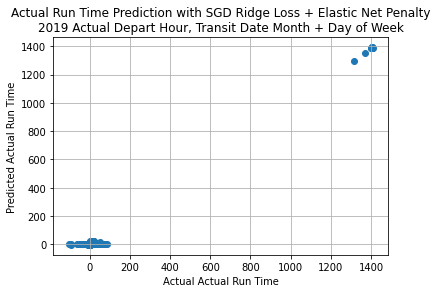

Mean Squared Error : 26.42574248343598
Mean Absolute Error : 3.372746503008664
[0.96560691 0.96596815 0.94890084 0.88348143 0.9645523 ]
0.95 accuracy with a standard deviation of 0.03


In [22]:
# SGD Ridge Loss + Elastic Net Penalty
# 2019 Actual Depart Hour, Transit Date Month + Day of Week

X = np.array(df3.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df3['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = Ridge()
%time lr_sgd.fit(X_train, Y_train)

plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Ridge Loss + Elastic Net Penalty\n2019 Actual Depart Hour, Transit Date Month + Day of Week')
# plt.ylim(-1,25)
# plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [23]:
# 2020 Data

# read file
df2020 = pd.read_csv(r'C:\Users\danie\Documents\GitHub\LTC-Research-Challenge\data\2020 Line 280 AVL allscripts.csv')

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


C:\Users\danie\AppData\Local\Temp/ipykernel_15700/1210325751.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df4.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_15700/1210325751.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__5  \
0                        0                0            0            0   
1                        6                6            0            0   
2                        0                0            0            0   
3                        9                9            0            0   
4                        8                6            0            0   
...                    ...              ...          ...          ...   
179478                   7                4            0            0   
179479                   0                4            0            0   
179480                   6                6            0            0   
179481                   0                6            0            0   
179482                   0               10            0            0   

        Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  Enc_Hour__10  \
0                

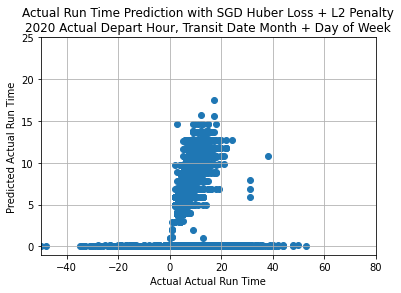

Mean Squared Error : 31.88257119951636
Mean Absolute Error : 2.835003115200107
[0.90209076 0.93675629 0.94548071 0.96327433 0.96426143]
0.94 accuracy with a standard deviation of 0.02


In [27]:
# SGD Huber Loss + L2 Penalty
# 2020 Actual Depart Hour, Transit Date Month + Day of Week

df4 = df2020.copy()

df4 = pd.get_dummies(df4, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week'], prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_'])

df4.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df4['Scheduled Run Time'] = df4['Scheduled Run Time'].astype(int)
df4['Actual Run Time'] = df4['Actual Run Time'].astype(int)

df4.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset'], 1, inplace=True)
print(df4.head)
X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df4['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)



plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Huber Loss + L2 Penalty\n2020 Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/1207857975.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train


Wall time: 1.28 s


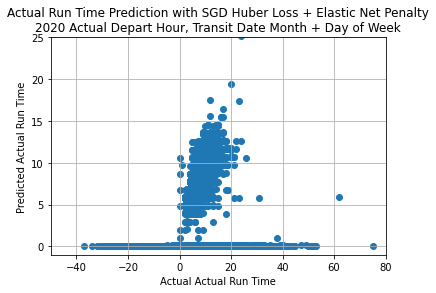

Mean Squared Error : 31.66863453591291
Mean Absolute Error : 2.8036719974618034
[0.96751805 0.96049693 0.94050057 0.94771756 0.89751477]
0.94 accuracy with a standard deviation of 0.02


In [36]:
# SGD Huber loss + Elastic Net Penalty
# 2020 Actual Depart Hour, Transit Date Month + Day of Week


X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df4['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber', penalty='elasticnet')
%time lr_sgd.fit(X_train, Y_train)

plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Huber Loss + Elastic Net Penalty\n2020 Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/16920784.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train


Wall time: 196 ms


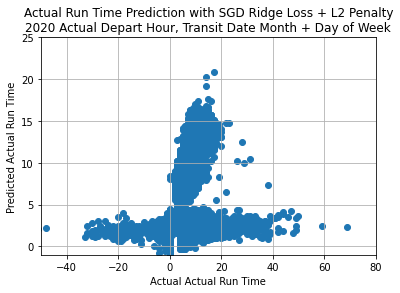

Mean Squared Error : 26.183539298263554
Mean Absolute Error : 3.5158250490132508
[0.95706363 0.90528835 0.95147313 0.91517162 0.91659452]
0.93 accuracy with a standard deviation of 0.02


In [44]:
# SGD Ridge loss + L2 Penalty
# 2020 Actual Depart Hour, Transit Date Month + Day of Week

X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df4['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = Ridge()
%time lr_sgd.fit(X_train, Y_train)

plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Ridge Loss + L2 Penalty\n2020 Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_15700/3222088490.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train


Wall time: 3.82 s


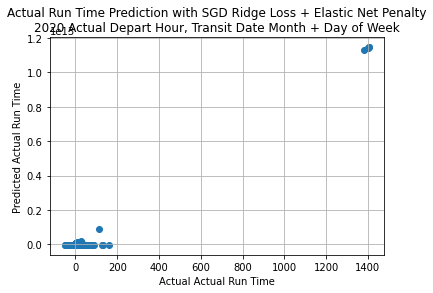

Mean Squared Error : 1.9402419004154797e+22
Mean Absolute Error : 31344506301.4161
[-7.75935970e+17 -1.12101722e+20 -8.42916948e+00 -5.56948424e+11
 -3.39796309e+11]
-22575531731845255168.00 accuracy with a standard deviation of 44764103789996949504.00


In [48]:
# SGD Ridge Loss + Elastic Net Penalty
# 2020 Actual Depart Hour, Transit Date Month + Day of Week


X = np.array(df4.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df4['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(penalty='elasticnet')
%time lr_sgd.fit(X_train, Y_train)

plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('Actual Run Time Prediction with SGD Ridge Loss + Elastic Net Penalty\n2020 Actual Depart Hour, Transit Date Month + Day of Week')
# plt.ylim(-1,25)
# plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))